# 数値解析ゼミ 〜Julia入門〜

プログラミング言語の一つであるJuliaの基本的な使い方について述べていく．

## 4. 関数の考え方

3章にてJuliaの制御構造（繰り返し処理と条件分岐処理）を考えた．
しかしここで，同じような処理を何度も行うプログラムを考えたとき，その何度も行う操作を操作の数だけコードを書くことは非効率である．

そこで，同一の操作に対し，フレームワークを先に作っておくことを考えたくなる．プログラミングにおいて，同一の操作を汎用的に行うことができる仕組みを**関数**と呼ぶ．

### 4.1 関数の定義

関数は，**引数**で与えられた入力に対して，何か計算した結果を**返り値**として返すものである．

関数は以下のように定義する．


[構文] **function文**

```
function [関数の名前]（引数1, 引数2, ...）
    return (返り値)
end
```


ここでは例として，2つの一次元配列を引数にとり，その内積を計算する関数を作ってみる．

In [1]:
function inner_product(X, Y)
    
    dot = 0       # 初期値の設定 
    
    for i in 1:length(X)    # lengthで配列要素数の取得
        dot += X[i] * Y[i]  # i.e.  dot(新) = dot(旧) + (X[i] * Y[i])
    end
    
    return dot    # return で計算した値を返す
    
end

inner_product (generic function with 1 method)

この関数が実行されると，

- まず，``dot``という変数が内部で定義され，初期値として値 $0$ が代入される．
- 次に，`for` ループにより内積の値(`X[i]*Y[i]`)が`dot`に代入される．
- 最後に，計算された`dot`の値がこの関数の出力として返される．

という処理が，与える引数に対して行われる．

In [2]:
## 例1
a = [1.0, 2.0]
b = [2.0, 1.0]
print(inner_product(a,b))

4.0

In [3]:
## 例2
x = [3, 5]
y = [12, 4]
print(inner_product(x,y))

56

このように，一度関数を定義してしまえば，繰り返し用いることができる．

また，上の例1，例2のセルではそれぞれ違う文字の変数を代入しているが，問題なく`inner_product`関数で計算出来ている．
すなわち，`inner_product`関数を定義する際に使用した変数`X`，`Y`はあくまで関数の構造を決定するための“仮引数”であることがわかる．この“仮引数”のことを**ローカル変数**（局所変数）という（詳細は後述）．

　

実は，関数の作成は「§1.3 シンボリック計算」の節で行っていた(!!!)． §1.3では準備として関数 $f(t) = t^2 + 3t + 2$ を用意するのに，

In [ ]:
f(t) = t^2 + 3t + 2

として（数学と同様の記法で）自然に書いていたが，この記法はJuliaでは（プログラミングにおける）“関数”と同様の処理がなされている．

実際，先ほど挙げた関数の構文に従って，$f(t) = t^2 + 3t + 2$ を書き直すと以下のようになる：

In [ ]:
function f(t)
    t^2 + 3t + 2 
end

このことから，この2つの関数の定義は等価である．

補足：

上のセルで関数を定義する際にreturn文を挿入していないが，これはJuliaの仕様として関数の最後の文の値が返り値となるというルールを採用しているだけである．
途中の文（あるいは変数）を返り値にしたい場合以外は，return文を挿入しなくても処理として問題ない．

#### *4.1.1 無名関数

いままで，関数に名前をつけてきた（たとえば，`inner_product`や，`f`など）．これに対し，名前を持たない関数（**無名関数**）を定義することも可能である．

すぐに使う目的の関数がない場合，無名関数で一時的に関数オブジェクトを作成しておくと便利である．

（いちいち，名前付き関数を定義せずともテストできるということ．）

無名関数のコーディング記法としては以下の例に挙げる2通りがある：

In [4]:
x -> x^2 + 2x - 1

#1 (generic function with 1 method)

In [5]:
function (x)
    x^2 + 2x - 1
end

#3 (generic function with 1 method)

無名関数を使う場合には上の記法を使う方が便利な場合が多い．しかも，`(入力) → (出力)`という直感的にも理解しやすい記法となっている．

以下の例のように，特に`map`関数と一緒に用いると便利な場合が多い．

In [29]:
map(x -> x^2 + 2x - 1, (1:10))

10-element Vector{Int64}:
   2
   7
  14
  23
  34
  47
  62
  79
  98
 119

※ map関数は第1引数に関数を指定し，第2引数に変数の定義域を指定する．出力結果として，関数の出力結果に対する値域を返す．

In [7]:
using Plots; gr()

Plots.GRBackend()

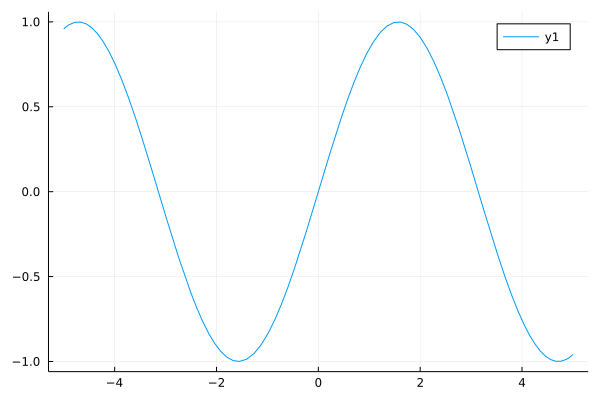

In [10]:
plot(x -> sin(x))

もちろん，引数が複数の場合にも対応している．

In [ ]:
(a,b) -> a+b

#### 4.1.2 複数の返り値を持つ関数

例えば，変数（もちろん何個あっても構わないが）に何かを演算を施し，結果を多変数で返したいときを考えたいとしよう（数学的にいう *ベクトル関数* というものである）．

その場合のプログラミングは以下のようになる．下のセルでは，例として2変数`x`，`y`に対し，`x+y`，`x-y`を同時に返すプログラムである：

In [13]:
function hoge(a, b)
    a+b, a-b
end

hoge (generic function with 1 method)

In [14]:
hoge(5,6)

(11, -1)

このように，結果をタプルで返してくれる．また，代入先もタプルで指定しておくと，タプルの値を簡単に成分ごとに分解してくれる．

In [15]:
x,y = hoge(5,6)

println(x)
println(y)

11
-1


#### 4.1.3 関数を使用したプログラミング例

ここでは，以前紹介したプログラム例を発展させた内容を紹介する．

§3.2 条件分岐処理 の中の例で，「判別式による二次方程式の解の分類」という例を紹介した．

【再掲】*判別式による二次方程式の解の分類*

In [18]:
a,b,c = 1,2,3 # 二次方程式の各係数


D = b^2 - 4*a*c # 二次方程式の判別式

if b >= 0
    B = "+"*string(b)
else
    B = string(b)
end

if c >= 0
    C = "+"*string(c)
else
    C = string(c)
end

print(string(a)*"x²"*B*"x"*C*" = 0 は")

if D > 0
    print("2つの実数解を持つ．")
    
elseif D == 0
    print("1つの実数解(重解)を持つ．")
    
else
    print("2つの虚数解を持つ．")
end

1x²+2x+3 = 0 は2つの虚数解を持つ．

今回はこのコードをさらに発展させ，二次方程式の判別式を計算し，それが
- 正の時は実数解
- 零の時は重解
- 負の時は虚数解

を計算するプログラムに改造してみよう．

まずは，「判別式による二次方程式の解の分類」のコードを関数として表現してみよう．

In [19]:
function discriminant(a, b, c)
    """
    a x**2 + b x + c = 0 の解が存在するか調べるプログラム．
    ２つの実根が存在する場合は `2つの実数解を持つ．` ，重根が存在する場合は `1つの実数解(重解)を持つ．`を，
    ２つの虚根が存在する場合は `2つの虚数解を持つ．` と表示する．
    """
    D = b^2 - 4*a*c # 二次方程式の判別式
    
    if D > 0
        println("2つの実数解を持つ．")
    
    elseif D == 0
        println("1つの実数解(重解)を持つ．")
    
    else
        println("2つの虚数解を持つ．")
    end
    
    return D
end

discriminant (generic function with 1 method)

In [22]:
discriminant(1,2,3)

2つの実数解を持つ．


364

確かに上手く動いていることがわかる．また，出力結果は判別式の値である．

これをもとに，残りの部分を関数として組み込んでいくと，下のセルのようになる．

In [23]:
function solve(a, b, c)
    
    if b >= 0
        B = "+"*string(b)
    else
        B = string(b)
    end

    if c >= 0
        C = "+"*string(c)
    else
        C = string(c)
    end

    print(string(a)*"x²"*B*"x"*C*" = 0 は")
    
    D = discriminant(a, b, c)
    
    √D = sqrt(Complex(D))   # Complex()で複素数を対応させる．
    
    x1 = (-b + √D)/ (2*a)
    x2 = (-b - √D)/ (2*a)
    
    println("また，その解は \nx = "*string(x1)*", "*string(x2)*"\nである．" )
    
    return x1, x2
    
end

solve (generic function with 1 method)

In [24]:
solve(1, 2, 3) 

1x²+2x+3 = 0 は2つの虚数解を持つ．
また，その解は 
x = -1.0 + 1.4142135623730951im, -1.0 - 1.4142135623730951im
である．


(-1.0 + 1.4142135623730951im, -1.0 - 1.4142135623730951im)

この関数の返り値を`x1, x2`（二次方程式の解）としておくことで，この値を使いまわすことが可能である．

In [ ]:
x, y = solve(1, 2, 3) 

In [ ]:
println(x)
println(y)

この通り，`x, y`という変数に「二次方程式の解」という出力結果を代入出来ている．

### *4.2 変数のスコープ

プログラミングする際，変数が入れ子の中にあるか外にあるかで，同じ名前の変数であってもその挙動を異にすることが往々にしてある．変数がいまどの範囲までを参照しているかという概念を**変数スコープ**と呼ぶ．

特定のJuliaの構文は <u>スコープブロック(scope block)</u> を作る．スコープブロックは何らかの変数の集合に対するスコープとして使われるコード領域のことである．

また，参照するスコープの階層のことを<u>スコープレベル(scope level)</u>という．これは構文が何個入れ子になってる箇所で変数が生きているかを指す概念である．

一例として，下のセルを実行し，Juliaにおける変数スコープを確認してみよう．

In [28]:
a, b = 1, 2;
let a=30, b=40
    let 
        b=500
        println(" inner scope: $a, $b")
    end
    println(" outer scope: $a, $b")
end
println("global scope: $a, $b")

 inner scope: 30, 500
 outer scope: 30, 500
global scope: 1, 2


上のセルで用いているlet～end文は，let～end文の中だけで使える変数を作り出す文だと思ってもらえれば良い．

このように，<u>あるブロック</u>（構文の開始から`end`までのひと塊のこと．例えば，function～end文や，for～end文，if～end文など．）<u>内でのみ使える変数</u>のことを**ローカル変数**(または局所変数)という．

例えば，上のセルではlet～end文で作られるスコープレベルによって，変数の指す値が変わっていることがわかる．

さらに，一番最初に定義してある`a=1, b=2`はlet～end文の一番外ではその値を保持している．このようにどのブロックにも属さない箇所での変数を**グローバル変数**(または大域変数)といい，ブロック内で変更を受けても，ブロック外では変更を受けないような変数となる．

ローカル変数に関しては，グローバル変数の値を引き継ぐものとそうでないものが存在する．このあたりの議論は本資料での議論の範疇を大きく超えるため割愛する．

（詳しくは，https://docs.julialang.org/en/v1/manual/variables-and-scoping/ を参照のこと．）